![SpinQuest/DarkQuest Layout](SpinQuestLayout.JPG)

# DarkQuest Analysis & Uproot Tutorial

[Root](https://root.cern/) is an object-oriented software framework for data analysis developed by CERN, and is used all throughout particle physics. This framework offers very useful features such as a GUI for interactive data analysis, file I/O, plotting functions (histograms, curve fitting, statistics, etc), and more. 

Since it is written in and relies on C++, using the ROOT application itself requires knowledge of C++ and can be tricky at first. This tutorial will not cover how to use ROOT itself, but instead [Uproot](https://uproot.readthedocs.io/en/latest/), a python library for reading ROOT files. Nonetheless, it is a good idea to play around with ROOT and learn how to use it, as it comes in very handy anywhere in particle physics. In addition, this tutorial will cover using the [Awkward](https://awkward-array.readthedocs.io/en/latest/) and [Awkward1](https://pypi.org/project/awkward1/) python libraries for dealing with nested arrays of nonuniform size.

**Tutorials/Documentation:**

* [Root](https://root.cern.ch/root/htmldoc/guides/primer/ROOTPrimer.html)
* [Uproot](https://uproot.readthedocs.io/en/latest/basic.html)
* [Awkward](https://awkward-array.readthedocs.io/en/latest/)
* [Awkward1](https://pypi.org/project/awkward1/)

**Physics of DarkQuest:** https://arxiv.org/pdf/1804.00661.pdf

# Installing Dependencies

Install the following packages:
```
pip install uproot
pip install awkward1
```
Ideally, use Anaconda and install all the packages in their own environment.

You'll also need `matplotlib` and `numpy`, but you probably have these already. Optionally, install `pandas` so that you can easily visualize the contents of the ROOT files you'll be working with:
```
pip install pandas
```

# Getting Started

After cloning this git repo, copy the ROOT files

`sim_eval_Brem_0.470915_z500_600_eps_-6.root` and 

`sim_eval_Brem_0.033428_z500_600_eps_-6.root` 

to this directory. These files contain simulated data of two electrons, the decay product of $A'$ dark photons produced by proton bremsstrahlung. The number after `Brem_` is the mass of the dark photon in GeV, followed by the fiducial decay region (z = 5-6 meters), and the kinetic mixing parameter $\epsilon=10^{-6}$. These are all properties of the simulation, and therefore produce different results. This tutorial will explore those different results while introducing analysis concepts in ROOT and Uproot.

Now, we use Uproot to read these files by passing the filename path to the `open` function:

In [88]:
import uproot

In [89]:
sim = "sim_eval_Brem_0.470915_z500_600_eps_-6.root"

truth = uproot.open(sim)

Now, `truth` contains the information from the top-level directory of the ROOT file for the high mass $A'$ data. Looking at the object we see that it is in fact a `ROOTDirectory` file:

In [90]:
type(truth)

uproot.rootio.ROOTDirectory

`ROOTDirectory` files are similar to Python dictionaries in that they have keys and values:

In [91]:
truth.keys()

[b'Truth;1']

These simulation files have only one subdirectory, named `Truth`, which itself is also a `ROOTDirectory`, with keys and values. 

**Note:** the `'b'` and `;1` in the object name refer to the fact that Uproot reads the name `Truth` as a raw bytestring and that there is only one `Truth` object in the ROOT file. It's not really anything to worry about

Let's take a look at what's inside of `Truth` in the first (higher-mass) simulation file. As a reminder, Python `dict` values can be accessed by including the corresponding key in square brackets:

In [92]:
type(truth["Truth"])

uproot.rootio.TTree

We see that the ROOT file contains one subdirectory `Truth`, which contains what is known as a `TTree`. TTrees are actually ROOT objects, which contain the physics data. In Uproot, TTrees again act as dictionaries. The physics information is stored in yet another layer, called a `TBranch`, which can be seen as the keys of the TTree:

In [93]:
print(truth["Truth"].keys())

[b'eventID', b'n_hits', b'hit_detID', b'hit_elmID', b'hit_driftdis', b'hit_pos', b'hit_detZ', b'hit_edep', b'hit_truthx', b'hit_truthy', b'hit_truthz', b'hit_truthpos', b'n_showers', b'sx_ecal', b'sy_ecal', b'sz_ecal', b'sedep_ecal', b'n_primaries', b'gtrkid', b'gpid', b'gvx', b'gvy', b'gvz', b'gpx', b'gpy', b'gpz', b'gpt', b'geta', b'gphi', b'ge', b'nhits_ecal', b'gx_ecal', b'gy_ecal', b'gz_ecal', b'gpx_ecal', b'gpy_ecal', b'gpz_ecal', b'gedep_ecal', b'gx_st1', b'gy_st1', b'gz_st1', b'gpx_st1', b'gpy_st1', b'gpz_st1', b'gx_st2', b'gy_st2', b'gz_st2', b'gpx_st2', b'gpy_st2', b'gpz_st2', b'gx_st3', b'gy_st3', b'gz_st3', b'gpx_st3', b'gpy_st3', b'gpz_st3', b'gx_h1', b'gy_h1', b'gz_h1', b'gpx_h1', b'gpy_h1', b'gpz_h1', b'gx_h2', b'gy_h2', b'gz_h2', b'gpx_h2', b'gpy_h2', b'gpz_h2', b'gx_p1', b'gy_p1', b'gz_p1', b'gpx_p1', b'gpy_p1', b'gpz_p1', b'gx_h4', b'gy_h4', b'gz_h4', b'gpx_h4', b'gpy_h4', b'gpz_h4', b'gx_h4y2l', b'gy_h4y2l', b'gz_h4y2l', b'gpx_h4y2l', b'gpy_h4y2l', b'gpz_h4y2l', b'gx

We can immediately see that there is useful information like the event ID, hit positions, momenta, energy deposits in the ECAL, and other variables.

It is much easier to visualize this data using `pandas`, which will display all of the information contained in the TTree in a simple table. In addition, since we know that these simulations only contain one TTree (`Truth`), we can open the TTree directly on calling `uproot.open()`, which makes the analysis code neater and simpler later down the line:

In [94]:
# just include the name of the key you want ("Truth")
truth = uproot.open(sim1)["Truth"]

# convert to a pandas dataframe for visualization
# don't flatten (flattening destroys per-event information)
df = truth1.pandas.df(flatten=False)

Now we can look at all the information contained in a the TTree much more easily

In [95]:
df

,eventID,n_hits,hit_detID,hit_elmID,hit_driftdis,hit_pos,hit_detZ,hit_edep,hit_truthx,hit_truthy,...,gz_dp1,gpx_dp1,gpy_dp1,gpz_dp1,gx_dp2,gy_dp2,gz_dp2,gpx_dp2,gpy_dp2,gpz_dp2
entry,,,,,,,,,,,,,,,,,,,,,
0,0,50,"[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, 17, 17, 1...","[95, 96, 95, 96, 94, 97, 94, 98, 73, 76, 74, 7...","[-0.10572851, -0.20398095, 0.15892136, 0.08459...","[-3.8259366, -3.1909366, -4.100358, -3.4653583...","[594.58215, 594.58215, 595.21814, 595.21814, 6...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[-4.7375755, -4.192838, -4.7477245, -4.178704,...","[2.8296027, 2.8571355, 2.8302917, 2.8590384, 2...",...,"[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]"
1,1,97,"[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, 17, 17, 1...","[116, 118, 117, 118, 135, 133, 136, 134, 105, ...","[0.110264726, -0.2658793, -0.24407953, 0.02280...","[9.509064, 10.779063, 9.869642, 10.504642, 20....","[594.58215, 594.58215, 595.21814, 595.21814, 6...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[14.484536, 14.57128, 14.500621, 14.5884075, 1...","[-18.764118, -15.345786, -18.803724, -15.35567...",...,"[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]"
2,2,52,"[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, 17, 17, 1...","[104, 103, 104, 103, 107, 104, 107, 105, 85, 8...","[-0.13392884, -0.08656998, 0.142582, 0.1850046...","[1.8890634, 1.2540634, 1.6146418, 0.97964185, ...","[594.58215, 594.58215, 595.21814, 595.21814, 6...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[1.9246267, 1.1858695, 1.9276234, 1.182655, 2....","[-0.4829222, 0.06477584, -0.4863781, 0.0660305...",...,"[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]"
3,3,54,"[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, 17, 17, 1...","[79, 78, 79, 78, 69, 71, 69, 71, 53, 53, 54, 5...","[0.038194224, -0.09215199, 0.3004502, 0.162315...","[-13.985937, -14.620936, -14.260358, -14.89535...","[594.58215, 594.58215, 595.21814, 595.21814, 6...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[-17.329445, -17.409082, -17.34924, -17.429474...","[12.1819935, 9.287857, 12.212207, 9.2881155, 1...",...,"[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]"
4,4,55,"[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, 17, 17, 1...","[111, 109, 111, 110, 106, 105, 106, 106, 88, 8...","[-0.016116062, 0.3064441, 0.27017146, -0.05213...","[6.3340635, 5.0640635, 6.059642, 5.4246416, 1....","[594.58215, 594.58215, 595.21814, 595.21814, 6...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[4.0342283, 3.4917006, 4.041884, 3.4937236, 4....","[10.115284, 8.340303, 10.134008, 8.340441, 11....",...,"[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]","[3.4028235e+38, 3.4028235e+38]"
...,...,...

From this dataframe we see that this file contains information from 10,000 simulated events, with each event containing 104 different variables.

Looking at the first event (`eventID == 0`), we see that 50 hits (`n_hits == 50`) were detected in detectors all throughout the experiment. For example, the detector in which these hits were detected can be inferred from the `hit_detID` variable, and the position of the hit *in* that detector can be determined from the `hit_elmID` variable.

Each of the 104 variables is a key in the TTree dict, with their values being returned as an array. In the case of the key `n_hits`, the associated value will be an array of length 10,000 - where each element is an integer corresponding to the total number of hits in that event.

In order to get the value(s) associated with a key (keys) of this TTree, we need to call the `array` (`arrays`) method on the TTree object:

In [96]:
# get an array containing the hit data
hits = truth.array("n_hits")
# show the resulting array
hits

array([50, 97, 52, ..., 37, 54, 65], dtype=int32)

In [97]:
print(len(hits))

10000


You could also get the data from two TBranches as well, which is returned as a `dict`:

In [98]:
# pass namedecode="utf-8" to get rid of the 'b' and get the keys as strings
event_hits = truth.arrays(["eventID", "n_hits"], namedecode="utf-8")
event_hits

{'eventID': array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int32),
 'n_hits': array([50, 97, 52, ..., 37, 54, 65], dtype=int32)}

You can now work with this data with the ease of Python!

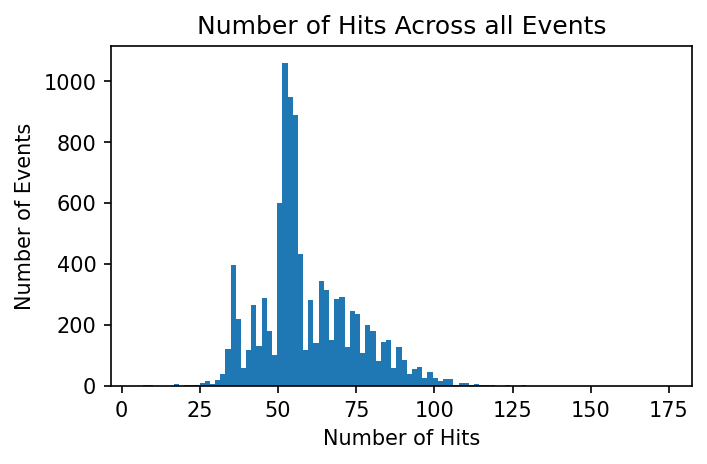

In [99]:
import numpy as np
import matplotlib.pyplot as plt

x = event_hits["n_hits"]
plt.figure(figsize=(5,3),dpi=150)
plt.hist(x,bins='auto');
plt.title("Number of Hits Across all Events");
plt.xlabel("Number of Hits");
plt.ylabel("Number of Events");

So far, we just looked at two TBranches which contain integer values (`n_hits` and `eventID`). There is another layer of complexity when you consider a branch that contains a list of values, such as `hit_detID`

In [100]:
detID = truth.array("hit_detID")
type(detID)

awkward.array.jagged.JaggedArray

The resulting array is a `JaggedArray`, which is a data type introduce by the `Awkward` library. These arrays are "jagged" or "awkward" in that they contain sub arrays of varying sizes. This is because the number of hits in each event differs, and therefore the arrays containing hit information will differ in size:

In [101]:
for i in range(5):
    print("There are {} hits in event {}".format(len(detID[i]), i))

There are 50 hits in event 0
There are 97 hits in event 1
There are 52 hits in event 2
There are 54 hits in event 3
There are 55 hits in event 4


Since each array contains hit information from a given event, these nested arrays carry crucial information about each event and therefore must be kept intact. The `awkward` library provides some useful tools for working with jagged arrays, which will be covered in the analysis portion of the tutorial. If you are not interested in keeping information for each event intact, you can `flatten` the array, essentially collapsing all sub-arrays into one large array. This destroys any information specific to a given event, though.

**Example of event-specific plot:**

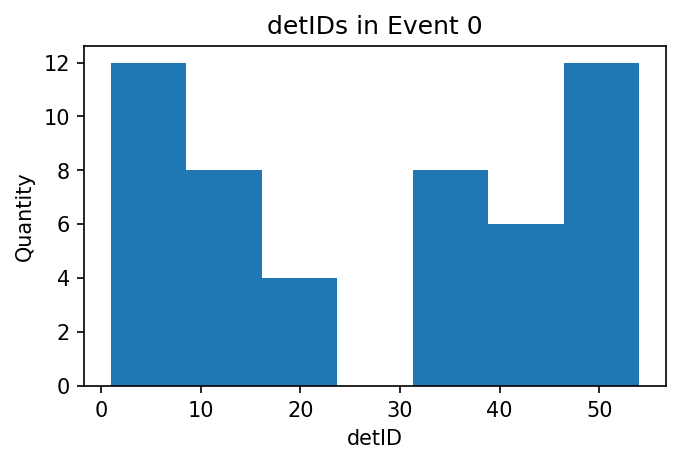

In [102]:
# get the hit_detID information from just the first event
x = detID[0]
plt.figure(figsize=(5,3),dpi=150)
plt.hist(x,bins='auto');
plt.title("detIDs in Event 0");
plt.xlabel("detID");
plt.ylabel("Quantity");

**detIDs across *all* 10,000 events:**

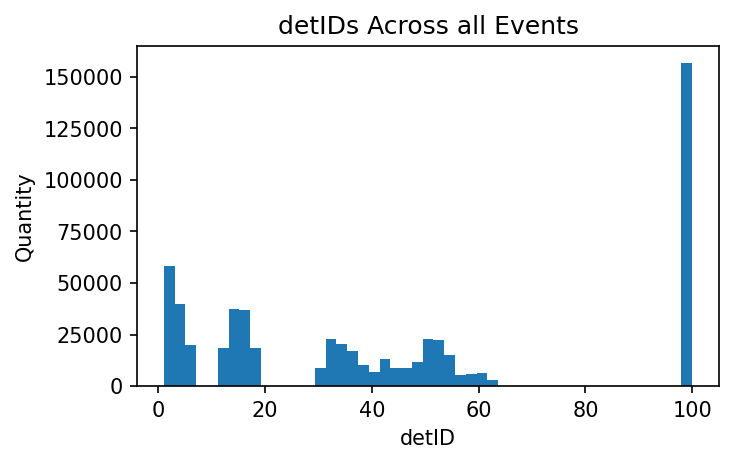

In [103]:
import awkward1 as ak

# flatten the jagged array -> all events merged
x = ak.flatten(detID)
plt.figure(figsize=(5,3),dpi=150)
plt.hist(x,bins='auto');
plt.title("detIDs Across all Events");
plt.xlabel("detID");
plt.ylabel("Quantity");

These results are fairly meaningless, but serve to highlight the concept of jagged arrays and the structure of the TTree and its branches

# Simple Analysis

This analysis will demonstrate how to operate on TTrees and their branches to make plots. Namely, it will demonstrate how to speed up analysis by applying masks to the data which capture only the information of interest. By applying a mask to a `JaggedArray`, one can select data far more efficiently than by looping over each array, making analysis much faster (almost as fast as ROOT C++).

Specifically, we will take a look at total hits in several of the detectors in the simulated experiment and make a cool 2D histogram of their distributions.

Starting from the beginning (opening the file, reading contents):

In [106]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward1 as ak

In [105]:
sim = "sim_eval_Brem_0.470915_z500_600_eps_-6.root"

truth = uproot.open(sim)["Truth"]

Let's get a dictionary which contains all of the relevant information:
* The detector ID of the hit 
* The hit x/y position of the hit - where in the detector the hit was recorded
* the z position of the hit - how far along the beamline the hit was detected

We will use the `awkward.zip` method, which joins all the data into one handy datatype, where we can specify the variable names we want and call them later.

In [180]:
# depth_limit=1 preserves the sub structure of the arrays
hits = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["hit_truthx"].array(),
               "y": truth["hit_truthy"].array(),
               "z": truth["hit_truthz"].array()
              }, depth_limit=1)

We can now access all variables of interest directly from `hits`:

In [169]:
# an array of 10,000 arrays, one for each event
hits.detID

<Array [[1, 1, 2, 2, 5, ... 35, 38, 49, 50]] type='10000 * var * int64'>

The detectors we are interested in are the hodoscopes, each belonging to a different station based on their z-position in the experiment (their distance along the beamline):
![SpinQuest/DarkQuest Layout](SpinQuestLayout.JPG)

The detector IDs of each of the hodoscopes are given [here:](https://github.com/cmantill/DarkQuest/blob/master/e1039-analysis/DataHits/exe/dataTuple.cxx#L75)
```
	    // detector ID refers to the detector number as seen here:
	    // st1-drift chambers| D0: 1-6, D1: 7-12
	    // st2-drift chambers| D2: 13-18
	    // st3-drift chambers| D3p: 19-24, D3m: 25-30
	    // h1-hodoscope: H1B/T: 31/22 H1L/R: 33/34
	    // h2-hodoscope: H2L/R: 35/36 H2B/T: 37/38
	    // h3-hodoscope: H3B/T: 39/40
	    // h4-hodoscope: H4Y1L/R: 41/42 H4Y2L/R: 43/44 H4B/T: 45/46
	    // proto-tubes: 47-54
	    // dp-stations: DP1:55-58, DP2:59-6 
```

So we will look at data from all the hodoscopes, masking for z-position which will tell us which station the hit belongs to. 

**Hodoscope Mask:**

The first mask will act to select for all hodoscopes by applying logical conditions to the `detID` parameter of our new `hits` array that we created earlier. The really useful thing about `awkward` and this masking technique is that if you feed the masking function an array of arrays, it will return a boolean array of the same dimensions, with the logical conditions satisfied. 

In [170]:
def hodoMask(arr):
    '''
    pass an array
    returns a mask fitted to all sub arrays
    '''
    # hodoscope detIDs range from 31 to 46 (see above)
    mask = (arr.detID >= 31) & (arr.detID <= 46)
    return mask

Let's see the action of this masking function:

In [171]:
# pass the hits array to our function
hodos = hodoMask(hits)
hodos

<Array [[False, False, ... False, False]] type='10000 * var * bool'>

Now, look at the actual values of `hodos` compared to our `hits` master array:

In [172]:
# look at the hit detectorIDs of the first event:
print(hodos[0])
print(hits.detID[0])

[False, False, False, False, False, False, ... False, False, False, False, False]
[1, 1, 2, 2, 5, 5, 6, 6, 3, 3, 4, 4, ... 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54]


Just from this, you can see that the `hodoMask` function acted over **all** sub-arrays of the `hits` array to reveal which hits are actually in the hodoscopes. This is further illustrated below, but play around with these masks to convince yourself of this behavior.

In [173]:
print("{}/{} of the hits in event 0 were in the hodoscopes\n".format(ak.sum(hodos[0]), len(hodos[0])))
count = 0
for i in range(len(hodos[0])):
    if hodos[0][i] == True:
        count+=1
        print("\thit {}/14 had detID {}".format(count,hits.detID[0][i]))

14/50 of the hits in event 0 were in the hodoscopes

	hit 1/14 had detID 34
	hit 2/14 had detID 34
	hit 3/14 had detID 32
	hit 4/14 had detID 32
	hit 5/14 had detID 35
	hit 6/14 had detID 36
	hit 7/14 had detID 38
	hit 8/14 had detID 38
	hit 9/14 had detID 46
	hit 10/14 had detID 46
	hit 11/14 had detID 41
	hit 12/14 had detID 42
	hit 13/14 had detID 43
	hit 14/14 had detID 44


As you can see, the detIDs are all within the range we defined in the `hodoMask` function: $$31\leq\text{detID}\leq46$$

This example shows the power of masking - combined with `awkward`, you can select only for data you're interested in over huge numbers of subarrays. Convince yourself of this by looking at some of the other events (elements) in the `hodos` array

In order to *apply* the mask, simply enclose the mask in closed brackets after the array to which you are applying the mask:
```
array[mask]
```
The array and mask must be of the same dimensions

In [183]:
masked = hits.detID[0][hodos[0]]
print(masked)

[34, 34, 32, 32, 35, 36, 38, 38, 46, 46, 41, 42, 43, 44]


**Station Mask:**

This mask will give us the station in which the hit was recorded based on the z-position of the hit. We will use the following as criteria:
* station 1 : $500 < z < 1000$
* station 2 : $1200 < z < 1600$
* station 3 : $z > 2000$

In [156]:
def stationMask(arr, zmin, zmax):
    mask = (arr.z > zmin) & (arr.z < zmax)
    return mask

**Combining the masks:**

Now that we can select for our detectors of interest (the hodoscopes) and the station where the hit took place (station 1/2/4), we can combine them using a logical and (`&`). This will provide an array of arrays where each element is true *if and only if* both masking criteria are satisfied.

So, let's say that we want to look at the hits in the station 1 hodoscopes:

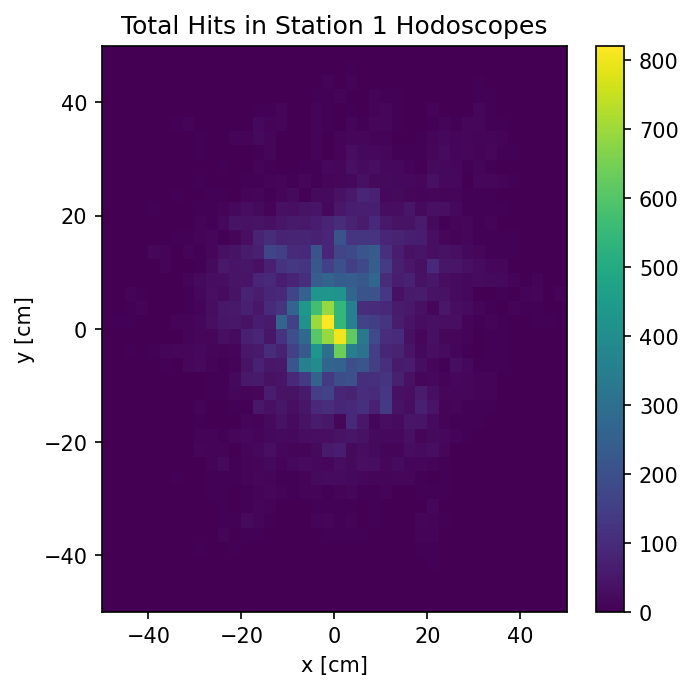

In [228]:
# mask for hodoscopes
hodo_mask = hodoMask(hits)

# mask for station 1
st1_mask = stationMask(hits, 500, 1000)

# combine the masks
hodo_st_mask = hodo_mask & st1_mask

# apply the double mask to all our data
result = hits[hodo_st_mask]

# get the x and y hits 
x = result.x
y = result.y

# at this point, x and y are 10,000 element arrays, one element per event
# let's flatten them and get the hits over all events
x = ak.flatten(x)
y = ak.flatten(y)

# now convert them from awkward HighLevelArrays to numpy arrays for plotting
x = ak.to_numpy(x)
y = ak.to_numpy(y)

# the above three steps can be simplified to just:
x = ak.to_numpy(ak.flatten(result.x))
y = ak.to_numpy(ak.flatten(result.y))

# plot!
plt.figure(figsize=(5,5),dpi=150);
plt.hist2d(x,y,range=[[-50,50],[-50,50]], bins=40);
plt.title("Total Hits in Station 1 Hodoscopes");
plt.xlabel("x [cm]");
plt.ylabel("y [cm]");
plt.colorbar();

**Putting it all together:**

Let's organize all the functions and methods into one cell so that it's easy to see how they all fit together and can be used in conjunction to select relevant data and plot it. 

In [239]:
# file reading
sim = "sim_eval_Brem_0.470915_z500_600_eps_-6.root"
truth = uproot.open(sim)["Truth"]

# gather the relevant variables in a simple data structure
hits = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["hit_truthx"].array(),
               "y": truth["hit_truthy"].array(),
               "z": truth["hit_truthz"].array()}, depth_limit=1)

# hodoscope mask
def hodoMask(arr):
    mask = (arr.detID >= 31) & (arr.detID <= 46)
    return mask

# station mask
def stationMask(arr, zmin, zmax):
    mask = (arr.z > zmin) & (arr.z < zmax)
    return mask

# plotting routine
def plotHodos(arr):
    # get the hodoscope mask
    hodo_mask = hodoMask(arr)
    # get the station masks
    st1_mask = stationMask(arr, 500, 1000)
    st2_mask = stationMask(arr, 1200, 1600)
    st4_mask = stationMask(arr, 2000, 10000)
    
    # combine the masks 
    st1_hodo_mask = hodo_mask & st1_mask
    st2_hodo_mask = hodo_mask & st2_mask
    st4_hodo_mask = hodo_mask & st4_mask
    
    # apply the masks 
    st1_hits = arr[st1_hodo_mask]
    st2_hits = arr[st2_hodo_mask]
    st4_hits = arr[st4_hodo_mask]
    
    # make a dict so we can loop over for plotting
    stations = {"Station 1" : st1_hits,
                "Station 2" : st2_hits,
                "Station 4" : st4_hits}
    
    # plotting routine
    for station in stations.keys():
        hits = stations[station]
        # get the x/y positions of the hits in the given station
        x = ak.to_numpy(ak.flatten(hits.x))
        y = ak.to_numpy(ak.flatten(hits.y))
        
        # plot
        plt.clf()
        plt.figure(figsize=(5,5),dpi=100);
        plt.hist2d(x,y,range=[[-100,100],[-100,100]],bins=50);
        plt.xlabel("x [cm]");
        plt.ylabel("y [cm]");
        plt.title("Total Hits in {}".format(station));
        plt.colorbar();
        plt.show()
        

<Figure size 432x288 with 0 Axes>

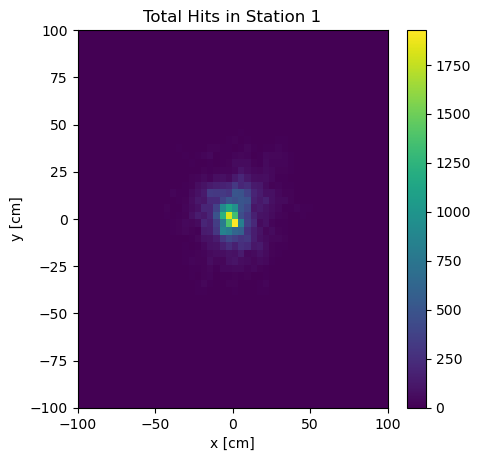

<Figure size 432x288 with 0 Axes>

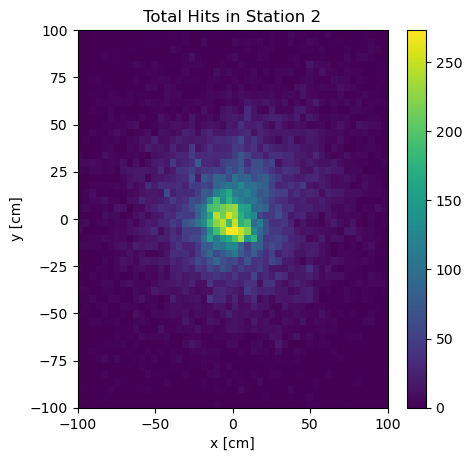

<Figure size 432x288 with 0 Axes>

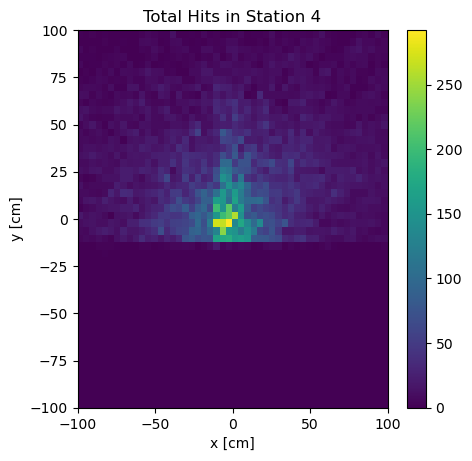

In [240]:
plotHodos(hits)

# Practice 

For practice, here are a few things you can try:

* plot different variables (momenta, ECAL showers, ECAL energy deposits, etc)
* Attempt to apply cuts on the data: apply masks that only select events with a certain criteria (i.e only accept events with hits inside a given x/y range)
    * Try making the cut such that it only accepts hits in a circular region of the station 1 hodoscopes ($\sqrt{x^2+y^2}\leq r$) and then plot the result. You will know you got it right when you only see a well-defined circular hit distribution in the 2D plot

For more examples of Jupyter notebook analyses, see [Cristina's repository](https://github.com/cmantill/DarkQuest/tree/master/e1039-analysis/python)